In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Load the data
data_path = 'Thesis/train_with_fuzzy_results.csv'
data = pd.read_csv(data_path)

             Time_step  Label Transaction_Id       Sender_Account  \
0  2022-01-07 00:02:00      0    T-174791-02   CHECKING-174582-02   
1  2022-01-07 00:02:00      0    T-498146-04   CHECKING-497984-04   
2  2022-01-07 00:02:00      0    T-498146-04   CHECKING-497984-04   
3  2022-01-07 00:02:00      0   T-1130131-06  CHECKING-1129929-06   
4  2022-01-07 00:02:00      0   T-1718316-04  CHECKING-1718173-04   

  Sender_Institution Sender_Country  USD_Amount         Bene_Account  \
0      JPMORGANCHASE  United States        0.00   CHECKING-174582-02   
1     BANK-498147-04  United States     2356.79   CHECKING-497991-04   
2     BANK-498147-04  United States     2356.79   CHECKING-497991-04   
3      JPMORGANCHASE  United States        0.00  CHECKING-1129929-06   
4    BANK-1718317-04  United States     5249.97  CHECKING-1718179-04   

  Bene_Institution   Bene_Country  ... Sender_Is_Pep  Sender_Customer_Id  \
0    JPMORGANCHASE  United States  ...             0              191692   


In [2]:
# Define the fuzzy variables
amount = ctrl.Antecedent(np.arange(0, 10000, 1000), 'amount')
cross_border = ctrl.Antecedent(np.arange(0, 2, 1), 'cross_border')
country_risk = ctrl.Antecedent(np.arange(0, 2, 1), 'country_risk')
pep_involvement = ctrl.Antecedent(np.arange(0, 2, 1), 'pep_involvement')
transaction_type = ctrl.Antecedent(np.arange(0, 3, 1), 'transaction_type')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# Set membership functions
amount.automf(3, names=['low', 'medium', 'high'])
cross_border['domestic'] = fuzz.trimf(cross_border.universe, [0, 0, 0.5])
cross_border['international'] = fuzz.trimf(cross_border.universe, [0.5, 1, 1])
country_risk['low'] = fuzz.trimf(country_risk.universe, [0, 0, 0.5])
country_risk['high'] = fuzz.trimf(country_risk.universe, [0.5, 1, 1])
pep_involvement['non_pep'] = fuzz.trimf(pep_involvement.universe, [0, 0, 0.5])
pep_involvement['pep'] = fuzz.trimf(pep_involvement.universe, [0.5, 1, 1])
transaction_type['domestic'] = fuzz.trimf(transaction_type.universe, [0, 0, 0.5])
transaction_type['international'] = fuzz.trimf(transaction_type.universe, [0.5, 1, 1.5])
transaction_type['digital'] = fuzz.trimf(transaction_type.universe, [1.5, 2, 2])
risk['low'] = fuzz.trimf(risk.universe, [0, 0, 50])
risk['medium'] = fuzz.trimf(risk.universe, [20, 50, 80])
risk['high'] = fuzz.trimf(risk.universe, [60, 100, 100])


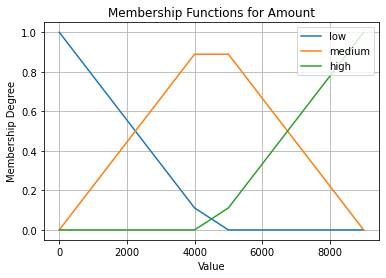

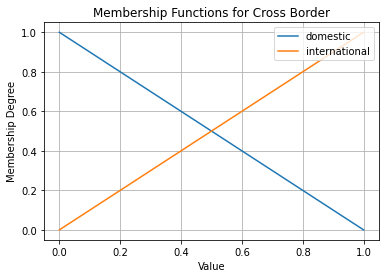

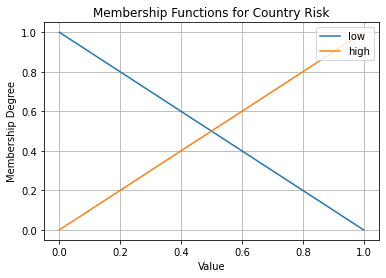

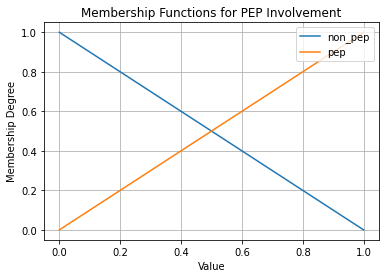

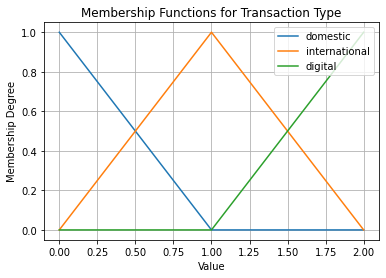

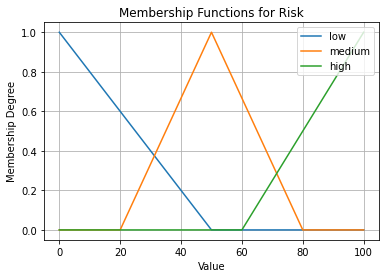

In [3]:
# Function to plot a membership function
def plot_membership(variable, title):
    plt.figure()
    for term in variable.terms.values():
        plt.plot(variable.universe, term.mf, label=term.label)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Membership Degree')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Plotting each membership function
plot_membership(amount, 'Membership Functions for Amount')
plot_membership(cross_border, 'Membership Functions for Cross Border')
plot_membership(country_risk, 'Membership Functions for Country Risk')
plot_membership(pep_involvement, 'Membership Functions for PEP Involvement')
plot_membership(transaction_type, 'Membership Functions for Transaction Type')
plot_membership(risk, 'Membership Functions for Risk')
